Image Segmentation Techniques
1. Thresholding
2. Region Growing
3. Watershed Segmentation
4. Exit

Enter img path: C:\Users\Laptop\Downloads\filtering_threshold_otsu_watershed\train_images\train_019.png


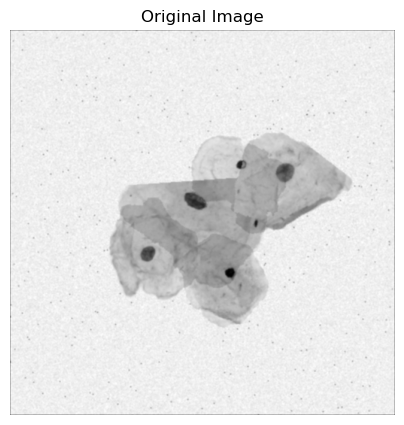

Enter your choice (1-4): 1
Enter threshold value (0-255): 127


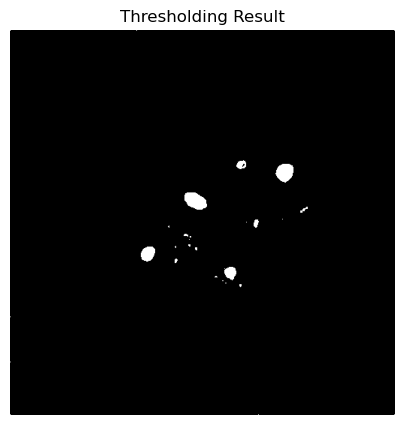

Enter your choice (1-4): 2
Enter seed pt x-coord: 100
Enter seed pt y-coord: 100
Enter intensity diff threshold: 10


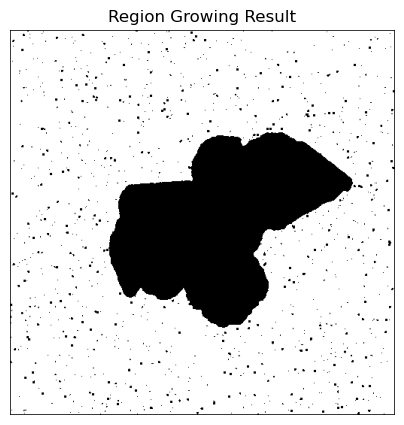

Enter your choice (1-4): 3


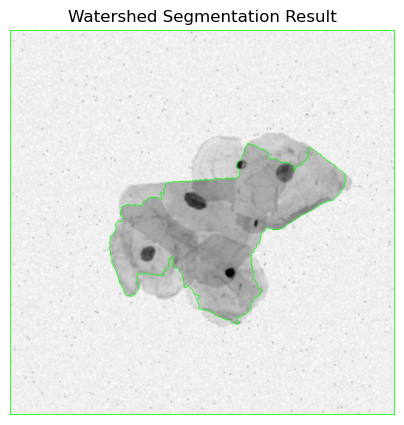

Enter your choice (1-4): 4


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def disp_img(title, img):
    
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def thresholding(img, threshold_val): #threshold=127
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, threshold_val, 255, cv2.THRESH_BINARY_INV)
    
    disp_img("Thresholding Result", thresh)
    
    return thresh

def region_growing(img, seed_pt, threshold):  #threshold=10
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ht, wdth = gray.shape
    mask = np.zeros_like(gray, np.uint8)
    
    #initialize stack with seed pt
    stk = [seed_pt]
    seed_val = gray[seed_pt[1], seed_pt[0]]
    mask[seed_pt[1], seed_pt[0]] = 255  # markv seed pt
    
    #define movements for neighboring pixels 8-connectivity
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    while stk:
        x, y = stk.pop()
        
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            
            #chk if neighbor is within img bounds
            if 0 <= nx < wdth and 0 <= ny < ht:
                
                #chk if pixel meets region-growing criteria
                if mask[ny, nx] == 0 and abs(int(gray[ny, nx]) - int(seed_val)) <= threshold:
                    
                    mask[ny, nx] = 255  #mark pixel as part of region
                    stk.append((nx, ny))
    
    disp_img("Region Growing Result", mask)
    
    return mask


def watershed(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #apply Gaussian blur to reduce noise and improve thresholding
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    #apply adaptive thresholding to create a binary img that focuses on the img
    _, binary = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    #noise removal with morphological opening
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    #sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    #finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    
    #unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    #marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    markers += 1
    markers[unknown == 255] = 0
    
    #apply watershed
    markers = cv2.watershed(img, markers)
    
    img[markers == -1] = [0, 255, 0]  #mark boundaries with green
    
    disp_img("Watershed Segmentation Result", img)
    
    return img


def main():
    
    print("Image Segmentation Techniques")
    print("1. Thresholding")
    print("2. Region Growing")
    print("3. Watershed Segmentation")
    print("4. Exit")

    file_path = input("\nEnter img path: ")
    img = cv2.imread(file_path)

    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    
    while True:
        
        ch = input("Enter your choice (1-4): ")
        
        if ch == '4':
            break
        
        if img is None:
            
            print("Error: could not read img. Please chk path.")
            continue
            
        if ch == '1':
            
            threshold_val = int(input("Enter threshold value (0-255): "))
            thresholding(img, threshold_val)
        
        elif ch == '2':
            
            x = int(input("Enter seed pt x-coord: "))
            y = int(input("Enter seed pt y-coord: "))
            
            threshold = int(input("Enter intensity diff threshold: "))
            region_growing(img, (x, y), threshold)
        
        elif ch == '3':
            watershed(img)
        
        else:
            print("Invalid choice. Please enter a num between 1 and 4.")
            
            
if __name__ == "__main__":
    main()

In [ ]:
# Image segmentation is a crucial technique in computer vision that involves dividing an image 
# into multiple segments or regions, typically to simplify or change the representation of an image into something 
# that is easier to analyze. 
# The goal of segmentation is to identify and separate objects or regions of interest within an image, 
# enabling more detailed analysis and interpretation.


# cv2: OpenCV library used for image processing.
# numpy: For numerical operations (e.g., creating arrays and applying mathematical operations).
# matplotlib.pyplot: For visualizing the images and results.



# Helper Function: disp_img
# Purpose: Display an image using matplotlib.

# Key Functionality:
# cv2.cvtColor: Converts an image to a specific color space (e.g., BGR to RGB for display).
# Handles grayscale images differently (cmap='gray' for single-channel images).



# Thresholding Function: thresholding
# Purpose: Perform binary thresholding on the image.

# Key Functionality:
# cv2.cvtColor: Converts the input image to grayscale for thresholding.
# cv2.threshold: Converts all pixel values greater or lesser than a threshold value to 255 (white) or 0 (black), respectively.
# The mode cv2.THRESH_BINARY_INV inverts the thresholding result.

# Thresholding segments an image into foreground and background based on pixel intensity values.
# It’s a global method and does not work well if the intensity varies widely across the image.



# Region Growing Function: region_growing
# Purpose: Extract regions in an image that are similar to the intensity value at a given seed point.

# Key Functionality:
# Uses a stack-based approach to explore neighboring pixels.
# Manual Region-Growing Algorithm:
# Start with a seed point.
# Add pixels to the region if their intensity difference from the seed value is less than a threshold.

# Region growing is a local segmentation technique. It works well if seed points are appropriately chosen, and intensity homogeneity is maintained.



# Watershed Function: watershed
# Purpose: Perform watershed segmentation to separate overlapping objects in an image.
# Key Functionality:

# Preprocessing:
# cv2.GaussianBlur: Reduces noise in the image.
# cv2.threshold (Otsus method): Automatically determines an optimal threshold value for binary conversion.
# cv2.morphologyEx: Removes noise and small irregularities using morphological operations.
# cv2.distanceTransform: Computes the distance to the nearest zero pixel, aiding in foreground segmentation.
# Segmentation:
# cv2.connectedComponents: Labels distinct objects in the foreground.
# cv2.watershed: Labels regions in an image based on marker-based segmentation, identifying boundaries between overlapping objects.
               

# Thresholding: threshold_value = 127
# Effect:
# Thresholding Overview:
# Thresholding is a method for separating an image into two regions: foreground (object) and background. Pixels with intensities above the threshold are considered foreground, while those below are background.
# With threshold_value = 127:

# Binary Classification:
# Pixels with intensity > 127 will be classified as foreground (white), and pixels with intensity <= 127 will be classified as background (black).
# Effect on Segmentation:

# Low Intensity Objects: If your object of interest has intensity values less than 127, it will be misclassified as background.
# High Intensity Objects: If your object of interest has intensity values greater than 127, it will be correctly classified as foreground.
# Typical Case: If the background is dark and the foreground (object) is bright, this threshold value could work fine. But if the object has varying intensity levels (e.g., due to shadows or lighting changes), part of the object might be classified as background or vice versa.
# How to Interpret the Thresholding with a Value of 127:
# Balanced Threshold: 127 is the midpoint of the typical 8-bit grayscale intensity range (0-255), so it’s often a reasonable default for images with balanced lighting.

    
# Region Growing: seed_pt = (100, 100), intensity_diff = 10
# Effect:
# Region Growing Overview:
# Region growing starts from a seed point (a pixel) and includes neighboring pixels with similar intensity values (determined by the intensity_diff threshold).
# Seed Point: (100, 100) represents the pixel where the region growing algorithm begins.
# Intensity Difference (intensity_diff = 10): Pixels that have an intensity difference within 10 units of the seed point’s intensity are added to the growing region.

# With seed_pt = (100, 100):
# Seed Placement:
# The seed point is located at pixel (100, 100), which corresponds to an intensity value at that location in the image (let’s assume the intensity value at that pixel is I_seed).
# If the image has uniform or predictable intensity patterns around the seed, the region will grow well from this point.
# If the seed is placed in an area with high contrast or near object edges, the region might grow inappropriately or fail to capture the entire object.

# With intensity_diff = 10:
# Region Growth Criteria:
# Pixels that are within 10 intensity units of the seed pixel’s intensity (I_seed) will be included in the growing region.
# Small Intensity Diff (10):
# The region will grow only if adjacent pixels have similar intensities, which is good for homogeneous regions but might fail in areas with gradient or varied intensities (e.g., near object boundaries).
# If the image has large regions with smooth intensity changes, this smaller intensity_diff will help capture a well-defined, homogeneous region.
# Effect on Segmentation:
# Low Intensity Diff: The region may grow slowly and only include pixels with very similar intensities. This is useful for segmenting objects that are homogeneous but might miss parts of the object that have slight intensity variations.
# High Intensity Diff: If you increase this value, the region can grow more aggressively and may incorrectly include background or other nearby regions that differ slightly in intensity.



# 1. Thresholding
# Parameter: threshold_val (Value Range: 0–255)
# Effect:
# Low Threshold Values (close to 0):
# More pixels are classified as the foreground, resulting in larger segmented regions.
# May include noise or unwanted regions as foreground.

# High Threshold Values (close to 255):
# Fewer pixels are classified as the foreground, potentially missing key parts of the image.
# Smaller and potentially more accurate segmented regions, but critical details could be lost.

# Reason for Choosing an Optimal Value:
# The threshold value should match the intensity distribution of the target object relative to its background. Use techniques like Otsu’s method for automatic threshold selection in variable lighting conditions.


# 2. Region Growing
# Parameter 1: seed_pt (Seed Point Coordinates, e.g., (x, y))
# Effect:
# Poor Seed Point Placement:
# If placed outside the region of interest (e.g., near edges or high-contrast areas), the algorithm may fail or grow into irrelevant regions.

# Well-Chosen Seed Point:
# Ensures accurate segmentation, as the region grows outward from a homogeneously-intense area.
# Reason for Careful Placement:
# The seed point determines the starting intensity value (seed_val). If it doesn’t represent the target region, the segmentation fails.

# Parameter 2: threshold (Intensity Difference Threshold)
# Effect:
# Low Threshold (e.g., 5-10):
# The algorithm only includes pixels with intensity very close to the seed point.
# Results in smaller, more precise regions but might fail if the target region has internal intensity variations.

# High Threshold (e.g., 50-100):
# Allows inclusion of pixels with a wider range of intensities.
# Risks growing into regions that don't belong to the target.

# Reason for Choosing an Optimal Value:
# The threshold should match the homogeneity of the target region. Uniform regions can work with low thresholds, while varying regions need higher thresholds.

# Parameter 3: Connectivity (4-Connectivity vs. 8-Connectivity)
# Effect:
# 4-Connectivity:
# Considers only the 4 direct neighbors (up, down, left, right).
# Results in straighter region boundaries but might leave small gaps.

# 8-Connectivity:
# Considers all 8 neighbors (diagonal connections included).
# Produces smoother, more natural region boundaries, but risks including unintended pixels if adjacent diagonal regions differ slightly.

# Reason to Choose 8-Connectivity:
# Works better for real-world images with diagonal edges and irregular shapes. 4-connectivity might suffice for simpler or grid-like structures.


# 3. Watershed
# Parameter 1: Thresholding (Initial Binary Threshold)
# Effect:
# Low Binary Threshold:
# Large parts of the background may incorrectly be classified as foreground, leading to improper segmentation.

# High Binary Threshold:
# May isolate too few pixels for foreground regions, reducing the number of markers available for the watershed algorithm.

# Reason to Use Adaptive Thresholds (e.g., Otsu’s Method):
# Automatically selects a threshold value that minimizes intra-class variance, making the algorithm more robust to varying lighting conditions.

# Parameter 2: Morphological Kernel Size (e.g., (3, 3), (5, 5))
# Effect:
# Small Kernel (e.g., (3, 3)):
# Removes minor noise but retains small unwanted regions, potentially leading to over-segmentation.

# Large Kernel (e.g., (7, 7)):
# Removes more noise but risks erasing small details or foreground objects.

# Reason for Choosing Kernel Size:
# The kernel should be proportional to the size of the noise and target features. Smaller objects require a smaller kernel to avoid loss of detail.

# Parameter 3: Distance Transform Threshold (0.5 * max_distance)
# Effect:
# Lower Multiplier (e.g., 0.3):
# Identifies smaller regions as “sure foreground,” potentially leading to fragmented markers.

# Higher Multiplier (e.g., 0.7):
# Expands the “sure foreground” regions, potentially merging nearby regions incorrectly.

# Reason for Choosing 0.5:
# A balanced threshold ensures good separation between foreground and background while maintaining distinct markers.
  
    
    
# Q1: Why do we convert the image to grayscale for most operations?
# Answer: Grayscale images reduce computational complexity by having only one channel (intensity) instead of three (BGR). Many algorithms, such as thresholding and region growing, rely on intensity comparisons, which are easier in grayscale.

# Q2: What is the role of cv2.morphologyEx in the watershed function?
# Answer: It removes noise and small objects in the binary image by applying morphological opening (erosion followed by dilation). This step ensures a clean foreground and background for segmentation.

# Q3: Why is cv2.THRESH_BINARY_INV used in thresholding?
# Answer: The inverted binary threshold is used to make the background black and the foreground white, which is often required for subsequent processing like region growing or morphological operations.

# Q4: What happens if we choose a poor seed point for region growing?
# Answer: If the seed point is chosen in a region with a lot of variation in intensity or close to edges, the algorithm may either fail to segment the desired region or include unwanted areas.

# Q5: What is the significance of cv2.distanceTransform in watershed segmentation?
# Answer: It computes the distance of every foreground pixel to the nearest zero pixel (background), helping to identify the "sure foreground" regions for better marker assignment.

# Q6: Explain the difference between connected components and watershed segmentation.
# Answer:
# Connected Components: Groups adjacent pixels based on similarity in intensity.
# Watershed: A marker-based technique that separates overlapping regions using boundaries.

# Q7: How can we improve the region-growing implementation?
# Answer: Improvements could include:
# Dynamic threshold adjustment based on region properties.
# Using multiple seed points for larger or irregular regions.
# Parallelizing the stack-based exploration for faster processing.

# Q8: Why is noise reduction important in segmentation, especially for watershed?
# Answer: Noise can create false markers or boundaries, leading to incorrect segmentation. Preprocessing steps like Gaussian blur or morphological operations ensure that only relevant regions are segmented.